In [138]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import uniform
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import (KFold, StratifiedKFold, cross_val_predict,
                                     cross_validate, train_test_split)
from sklearn.preprocessing import normalize
from xgboost import XGBClassifier
from evaluation import Evaluation
from preprocessing import Preprocessing
from hyp_tuning import HypTuning
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
import sys

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter

warnings.filterwarnings("ignore")

##Variables 
nb_hours = 24
random_state = 1
TBI_split = False
tuning = False
SHAP = False
imputation = 'No'
model_name = 'XGBoost'
threshold = 4

assert model_name in ['RF', 'XGBoost', 'LightGBM', 'Stacking'], "Please specify a valid model name"
assert imputation in ['No', 'carry_forward', 'linear', 'multivariate'], "Please specify a valid imputation method"

##data loading 
df_hourly = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_hour_std.csv', delimiter=',').sort_values(by=['stay_id'])
df_24h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_24hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_48h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_48hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_med = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_med.csv", delimiter=',').sort_values(by=['stay_id'])
df_demographic = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\demographics_mimic4.csv", delimiter=',').sort_values(by=['stay_id'])
features = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\Master-Project\MIMIC_IV\resources\features.csv', header = None)
diag = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\mimiciv_diag.csv')



print('Data Loading - done')

if nb_hours == 24:
   features = features.loc[:224,2] 
else:
   features = features.loc[:,0]


#Preprocessing
pr_carry = Preprocessing(df_hourly, df_24h, df_48h, df_med, df_demographic, nb_hours, TBI_split, random_state, 'carry_forward', diag)


##data loading 
df_hourly = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_hour_std.csv', delimiter=',').sort_values(by=['stay_id'])
df_24h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_24hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_48h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_48hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_med = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_med.csv", delimiter=',').sort_values(by=['stay_id'])
df_demographic = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\demographics_mimic4.csv", delimiter=',').sort_values(by=['stay_id'])
features = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\Master-Project\MIMIC_IV\resources\features.csv', header = None)
diag = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\mimiciv_diag.csv')


pr_lin = Preprocessing(df_hourly, df_24h, df_48h, df_med, df_demographic, nb_hours, TBI_split, random_state, 'linear', diag)


##data loading 
df_hourly = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_hour_std.csv', delimiter=',').sort_values(by=['stay_id'])
df_24h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_24hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_48h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_48hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_med = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_med.csv", delimiter=',').sort_values(by=['stay_id'])
df_demographic = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\demographics_mimic4.csv", delimiter=',').sort_values(by=['stay_id'])
features = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\Master-Project\MIMIC_IV\resources\features.csv', header = None)
diag = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\mimiciv_diag.csv')


pr_multi = Preprocessing(df_hourly, df_24h, df_48h, df_med, df_demographic, nb_hours, TBI_split, random_state, 'multivariate', diag)


final_data_carry, _ = pr_carry.preprocess_data(threshold)
final_data_lin, _ = pr_lin.preprocess_data(threshold)
final_data_multi, _ = pr_multi.preprocess_data(threshold)

print('Data Preprocessing - done')

Data Loading - done
med_name  ACD-A Citrate (1000ml)  ACD-A Citrate (500ml)  Acetaminophen-IV  \
sum                          0.0                    0.0               0.0   

med_name  Acetylcysteine  Acyclovir  Adenosine  Albumin 25%  Albumin 5%  \
sum                  0.0        0.0        0.0          0.0         0.0   

med_name  Alteplase (TPA)  Ambisome  ...  Two Cal HN (Full)  Vancomycin  \
sum                   0.0       0.0  ...                0.0         1.0   

med_name  Vasopressin  Vecuronium  Verapamil  Vital 1.5 (Full)  \
sum               0.0         0.0        0.0               0.0   

med_name  Vital High Protein (Full)  Vitamin K (Phytonadione)  Vivonex (Full)  \
sum                             0.0                       0.0             0.0   

med_name  Voriconazole  
sum                0.0  

[1 rows x 220 columns]
med_name  ACD-A Citrate (1000ml)  ACD-A Citrate (500ml)  Acetaminophen-IV  \
sum                          0.0                    0.0               0.0   

In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import uniform
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import (KFold, StratifiedKFold, cross_val_predict,
                                     cross_validate, train_test_split)
from sklearn.preprocessing import normalize
from xgboost import XGBClassifier
from evaluation import Evaluation
from preprocessing import Preprocessing
from hyp_tuning import HypTuning
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
import sys

from collections import Counter

warnings.filterwarnings("ignore")

##Variables 
nb_hours = 24
random_state = 1
TBI_split = False
tuning = False
SHAP = False
imputation = 'No'
model_name = 'XGBoost'
threshold = 4


In [2]:
df_hourly = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_hour_std.csv', delimiter=',').sort_values(by=['stay_id'])
df_24h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_24hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_48h = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_48hour.csv', delimiter=',').sort_values(by=['stay_id'])
df_med = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_med.csv", delimiter=',').sort_values(by=['stay_id'])
df_demographic = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\demographics_mimic4.csv", delimiter=',').sort_values(by=['stay_id'])
features = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\Master-Project\MIMIC_IV\resources\features.csv', header = None)
diag = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\mimiciv_diag.csv')


pr_no = Preprocessing(df_hourly, df_24h, df_48h, df_med, df_demographic, nb_hours, TBI_split, random_state, 'No', diag)
final_data_no, _ = pr_no.preprocess_data(threshold)

med_name  ACD-A Citrate (1000ml)  ACD-A Citrate (500ml)  Acetaminophen-IV  \
sum                          0.0                    0.0               0.0   

med_name  Acetylcysteine  Acyclovir  Adenosine  Albumin 25%  Albumin 5%  \
sum                  0.0        0.0        0.0          0.0         0.0   

med_name  Alteplase (TPA)  Ambisome  ...  Two Cal HN (Full)  Vancomycin  \
sum                   0.0       0.0  ...                0.0         1.0   

med_name  Vasopressin  Vecuronium  Verapamil  Vital 1.5 (Full)  \
sum               0.0         0.0        0.0               0.0   

med_name  Vital High Protein (Full)  Vitamin K (Phytonadione)  Vivonex (Full)  \
sum                             0.0                       0.0             0.0   

med_name  Voriconazole  
sum                0.0  

[1 rows x 220 columns]
med_name  ACD-A Citrate (1000ml)  ACD-A Citrate (500ml)  Acetaminophen-IV  \
sum                          0.0                    0.0               0.0   

med_name  Acetylcy

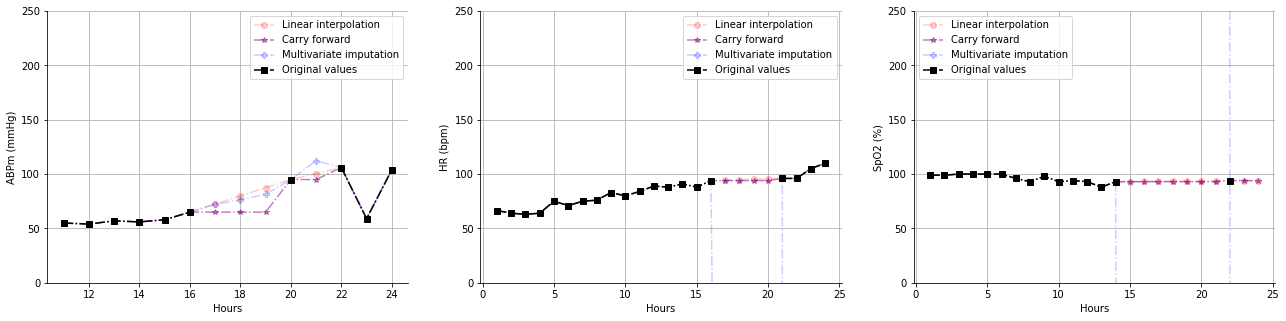

In [137]:
from matplotlib import cm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = df_hourly.pivot_table(index = ['stay_id', 'hour_from_intime'], columns = 'feature_name', values = 'feature_mean_value')
data = data.reset_index(level='stay_id')
interpo = data.interpolate(limit = 100)

batchs = pr_no.create_batchs(data)
interpo = pr_no.create_batchs(interpo)
carry = pr_no.create_batchs(data)
imp = pr_no.create_batchs(data)


batchd = imp

for i in range(len(batchs)):
    batchs[i] = batchs[i].reindex(range(1,25))
    batchs[i] = batchs[i].drop(columns = 'stay_id')
    interpo[i] = batchs[i].interpolate(limit = 100)
    carry[i] = batchs[i].fillna(method = "ffill", inplace=False)

    imp[i] = batchs[i].interpolate(limit = 100, method = 'krogh')



patient = 55

patient3 = 10
patient2 = 100

list_vit = ['ABPm', 'HR', 'SpO2']
list_vit_clean = ['ABPm (mmHg)', 'HR (bpm)', 'SpO2 (%)']
list_imp = [1,3,6]
fig, axes = plt.subplots(1,3, figsize=(22, 5))

axe = axes.ravel()

color = iter(cm.rainbow(np.linspace(0, 1, len(batchs))))
# fig.suptitle('Vitals linear interpolation for patients {pat1} and {pat2}'.format(pat1=patient, pat2 = patient2))
for i in range(len(list_vit)):
    interpo[patient][list_vit[i]].plot(x = range(nb_hours),marker='o', ax = axe[i], alpha = 0.2, xlabel = 'Hours', linestyle='-.', color = 'red', ylabel = list_vit_clean[i], ylim = [0,250])
    carry[patient][list_vit[i]].plot(x = range(nb_hours),marker='*', ax = axe[i], alpha = 0.5, xlabel = 'Hours', linestyle='-.', color = 'purple', ylabel = list_vit_clean[i], ylim = [0,250])
    imp[patient][list_vit[i]].plot(x = range(nb_hours),marker='P', ax = axe[i], alpha = 0.2, xlabel = 'Hours', linestyle='-.', color = 'blue', ylabel = list_vit_clean[i], ylim = [0,250])
    batchs[patient][list_vit[i]].plot(ax = axe[i], xlabel = 'Hours',marker='s', linestyle='-.', alpha = 1, color = 'black', ylabel = list_vit_clean[i], legend = 'patient 43')
    axe[i].spines['top'].set_visible(False)
    axe[i].spines['right'].set_visible(False)
    axe[i].grid()
    axe[i].legend(['Linear interpolation', 'Carry forward', 'Multivariate imputation', 'Original values'])


